# UK Vaccination Effectiveness
This notebook shows a graph indicating strong inverse correlation between vaccination rates and hospitalizations and deaths.

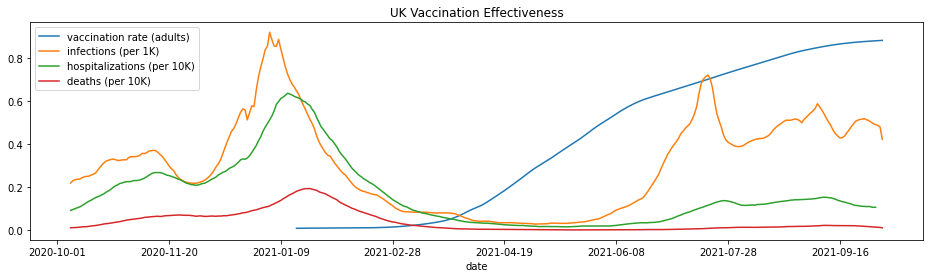

In [1]:
import pandas as pd

# Load data for the UK
df = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/location/GB.csv')

# Keep data for 2021 only
df = df[df.date >= '2020-10-01'].set_index('date')

# Compute population counts
total_population = df.population.iloc[0]
adult_population = total_population - df.population_age_00_09.iloc[0] - df.population_age_10_19.iloc[0]

# Compute smoothed averages of our variables
X = pd.DataFrame(index=df.index)
X['vaccination rate (adults)'] = df.cumulative_persons_fully_vaccinated.rolling(7).mean() / adult_population
X['infections (per 1K)'] = df.new_confirmed.rolling(7).mean() / total_population * 1_000
X['hospitalizations (per 10K)'] = df.new_hospitalized_patients.rolling(7).mean() / total_population * 10_000
X['deaths (per 10K)'] = df.new_deceased.rolling(7).mean() / total_population * 10_000

X.plot(figsize=(16, 4), title='UK Vaccination Effectiveness');